### Problem Defnition

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### Abstract: 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.

### Data Set Information:

The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Source: https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)

#### Attribute Information:

ATTRIBUTES

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area
ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4
MINOR AXIS

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4
MAJOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

NUMBER OF CLASSES

4 OPEL, SAAB, BUS, VAN

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import time

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [229]:
# Reading dataset into dataframe
data_df = pd.read_csv("vehicle.csv")
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [230]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [231]:
data_df.shape

(846, 19)

In [232]:
data_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [233]:
data_df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [234]:
data_df.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

###### We can see some of attributes counts are not matching with actual counts of tragte attribute, so we can conculed that there some missing values which needs to be treated properly. Lets find the missing values from each attribute.

##### Lets encode categorical variable first

In [235]:
# One hot encoding for categorical variables
data_df['class'] = data_df['class'].replace( {"van" : 1, 'car' :2, 'bus' :3})

In [236]:
# check missing values from the data
data_df[~data_df.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [237]:
# check missing values from the data
data_df[data_df.isnull().any(axis=1)].count()

compactness                    33
circularity                    28
distance_circularity           29
radius_ratio                   27
pr.axis_aspect_ratio           31
max.length_aspect_ratio        33
scatter_ratio                  32
elongatedness                  32
pr.axis_rectangularity         30
max.length_rectangularity      33
scaled_variance                30
scaled_variance.1              31
scaled_radius_of_gyration      31
scaled_radius_of_gyration.1    29
skewness_about                 27
skewness_about.1               32
skewness_about.2               32
hollows_ratio                  33
class                          33
dtype: int64

##### Treat the missing value by filling with median value of the each columns

In [238]:
data_df = data_df.apply(lambda x: x.fillna(x.median()), axis=0)

In [239]:
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    2.022459    0.702130    1.0    2.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          2.0    3.00     3.0

###### Lets plot boxplot by each column by Traget attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA74968128>,
      dtype=object)

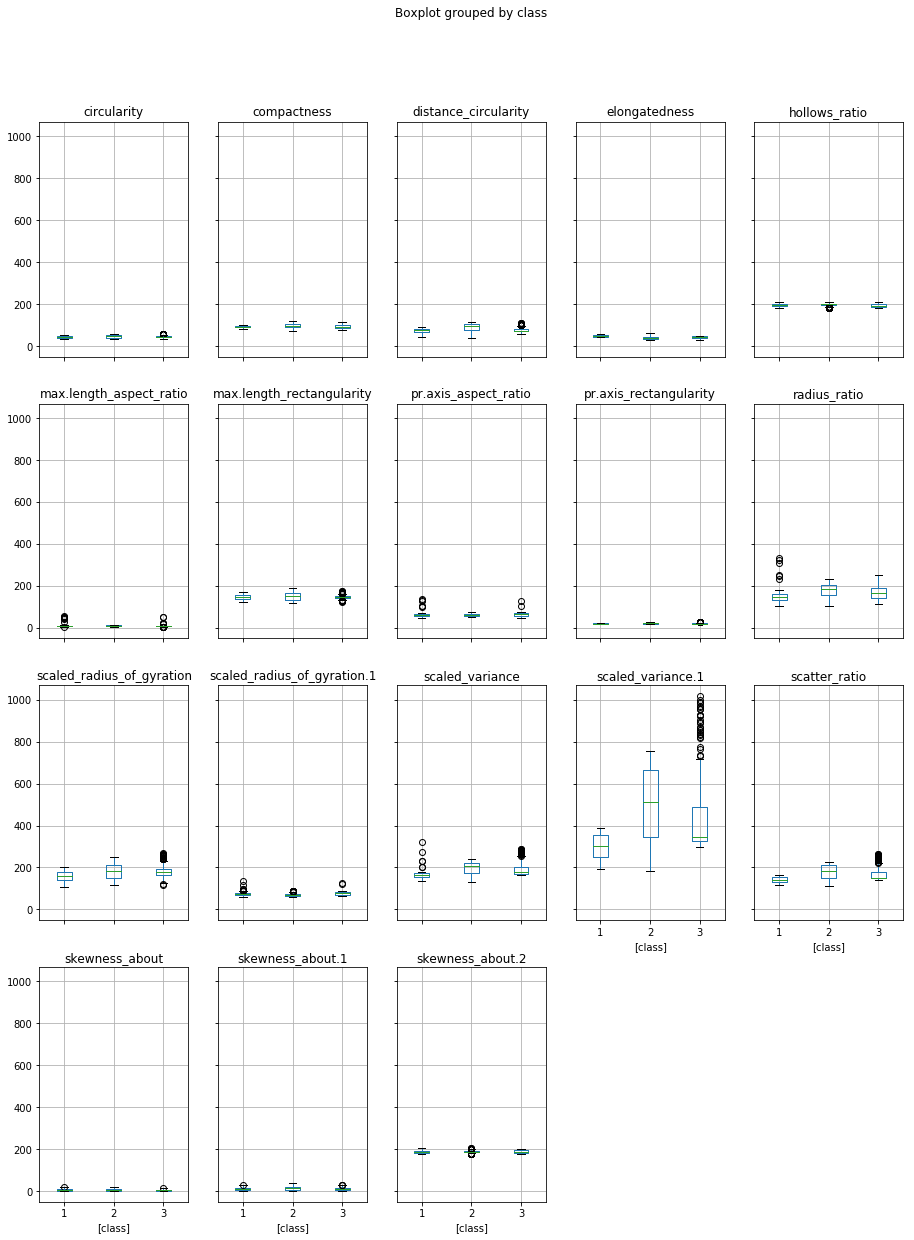

In [142]:
data_df.boxplot(by = 'class',  layout=(4,5), figsize=(15, 20))

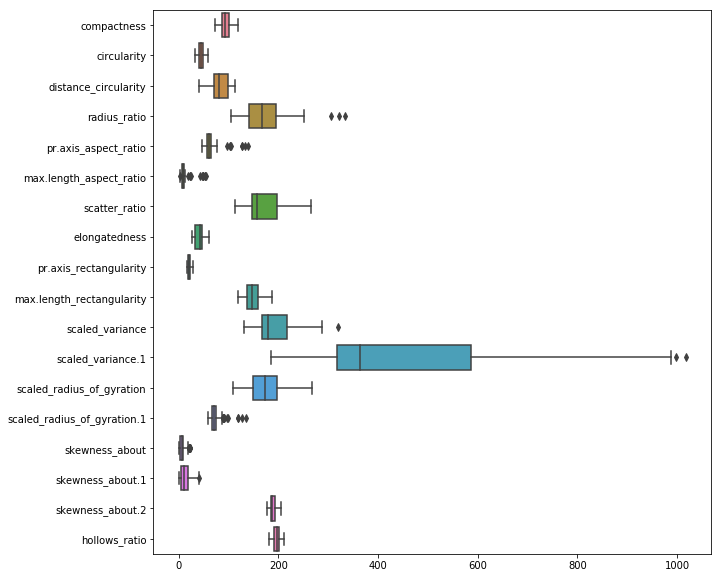

In [152]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_df.drop(columns=['class']), orient='horizontal', palette='husl')

From the above boxplot we can see there are outliers in some of the attributes which may effect the model performances. These outliers should e´b treated by nomralising the data set before model build.

###### Lets see the relatioship between the attributes

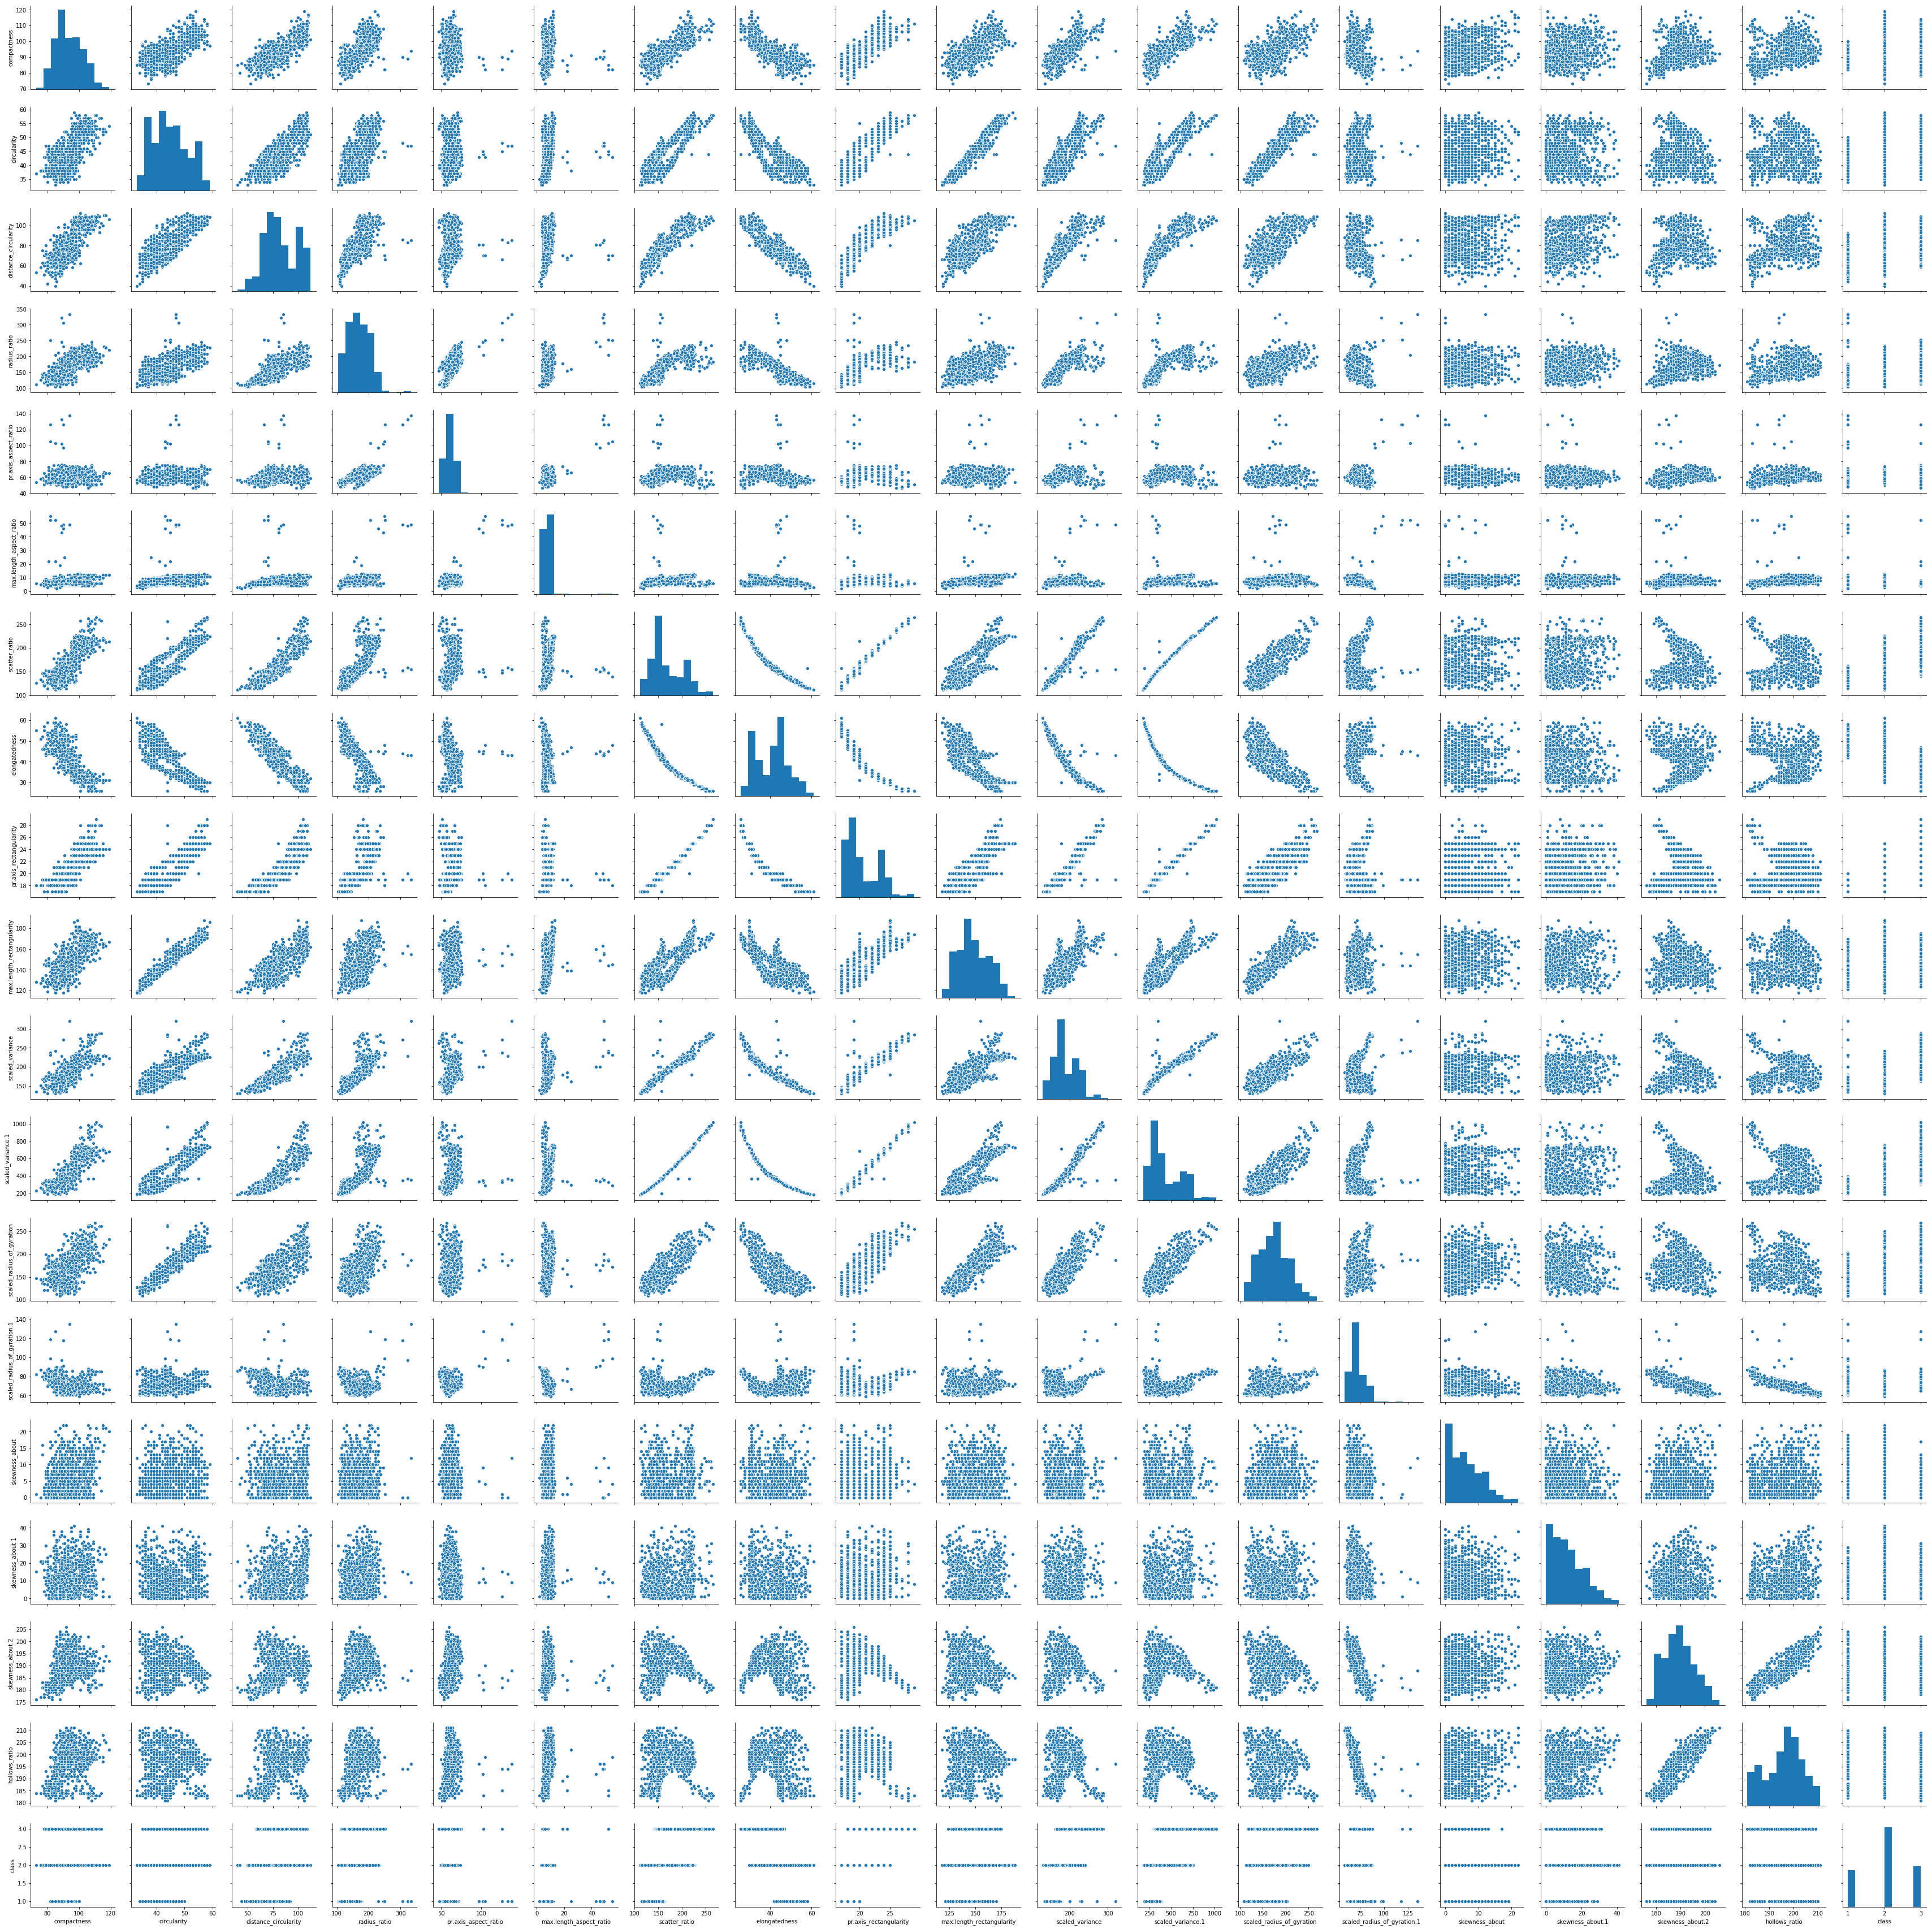

In [147]:
sns.pairplot(data_df)

From the above pairplots we can see most of the attributes are postively skewed and there are correlation between some attributes, lets plot the pairplots again based on Target variable.

C:\Users\352659\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\352659\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


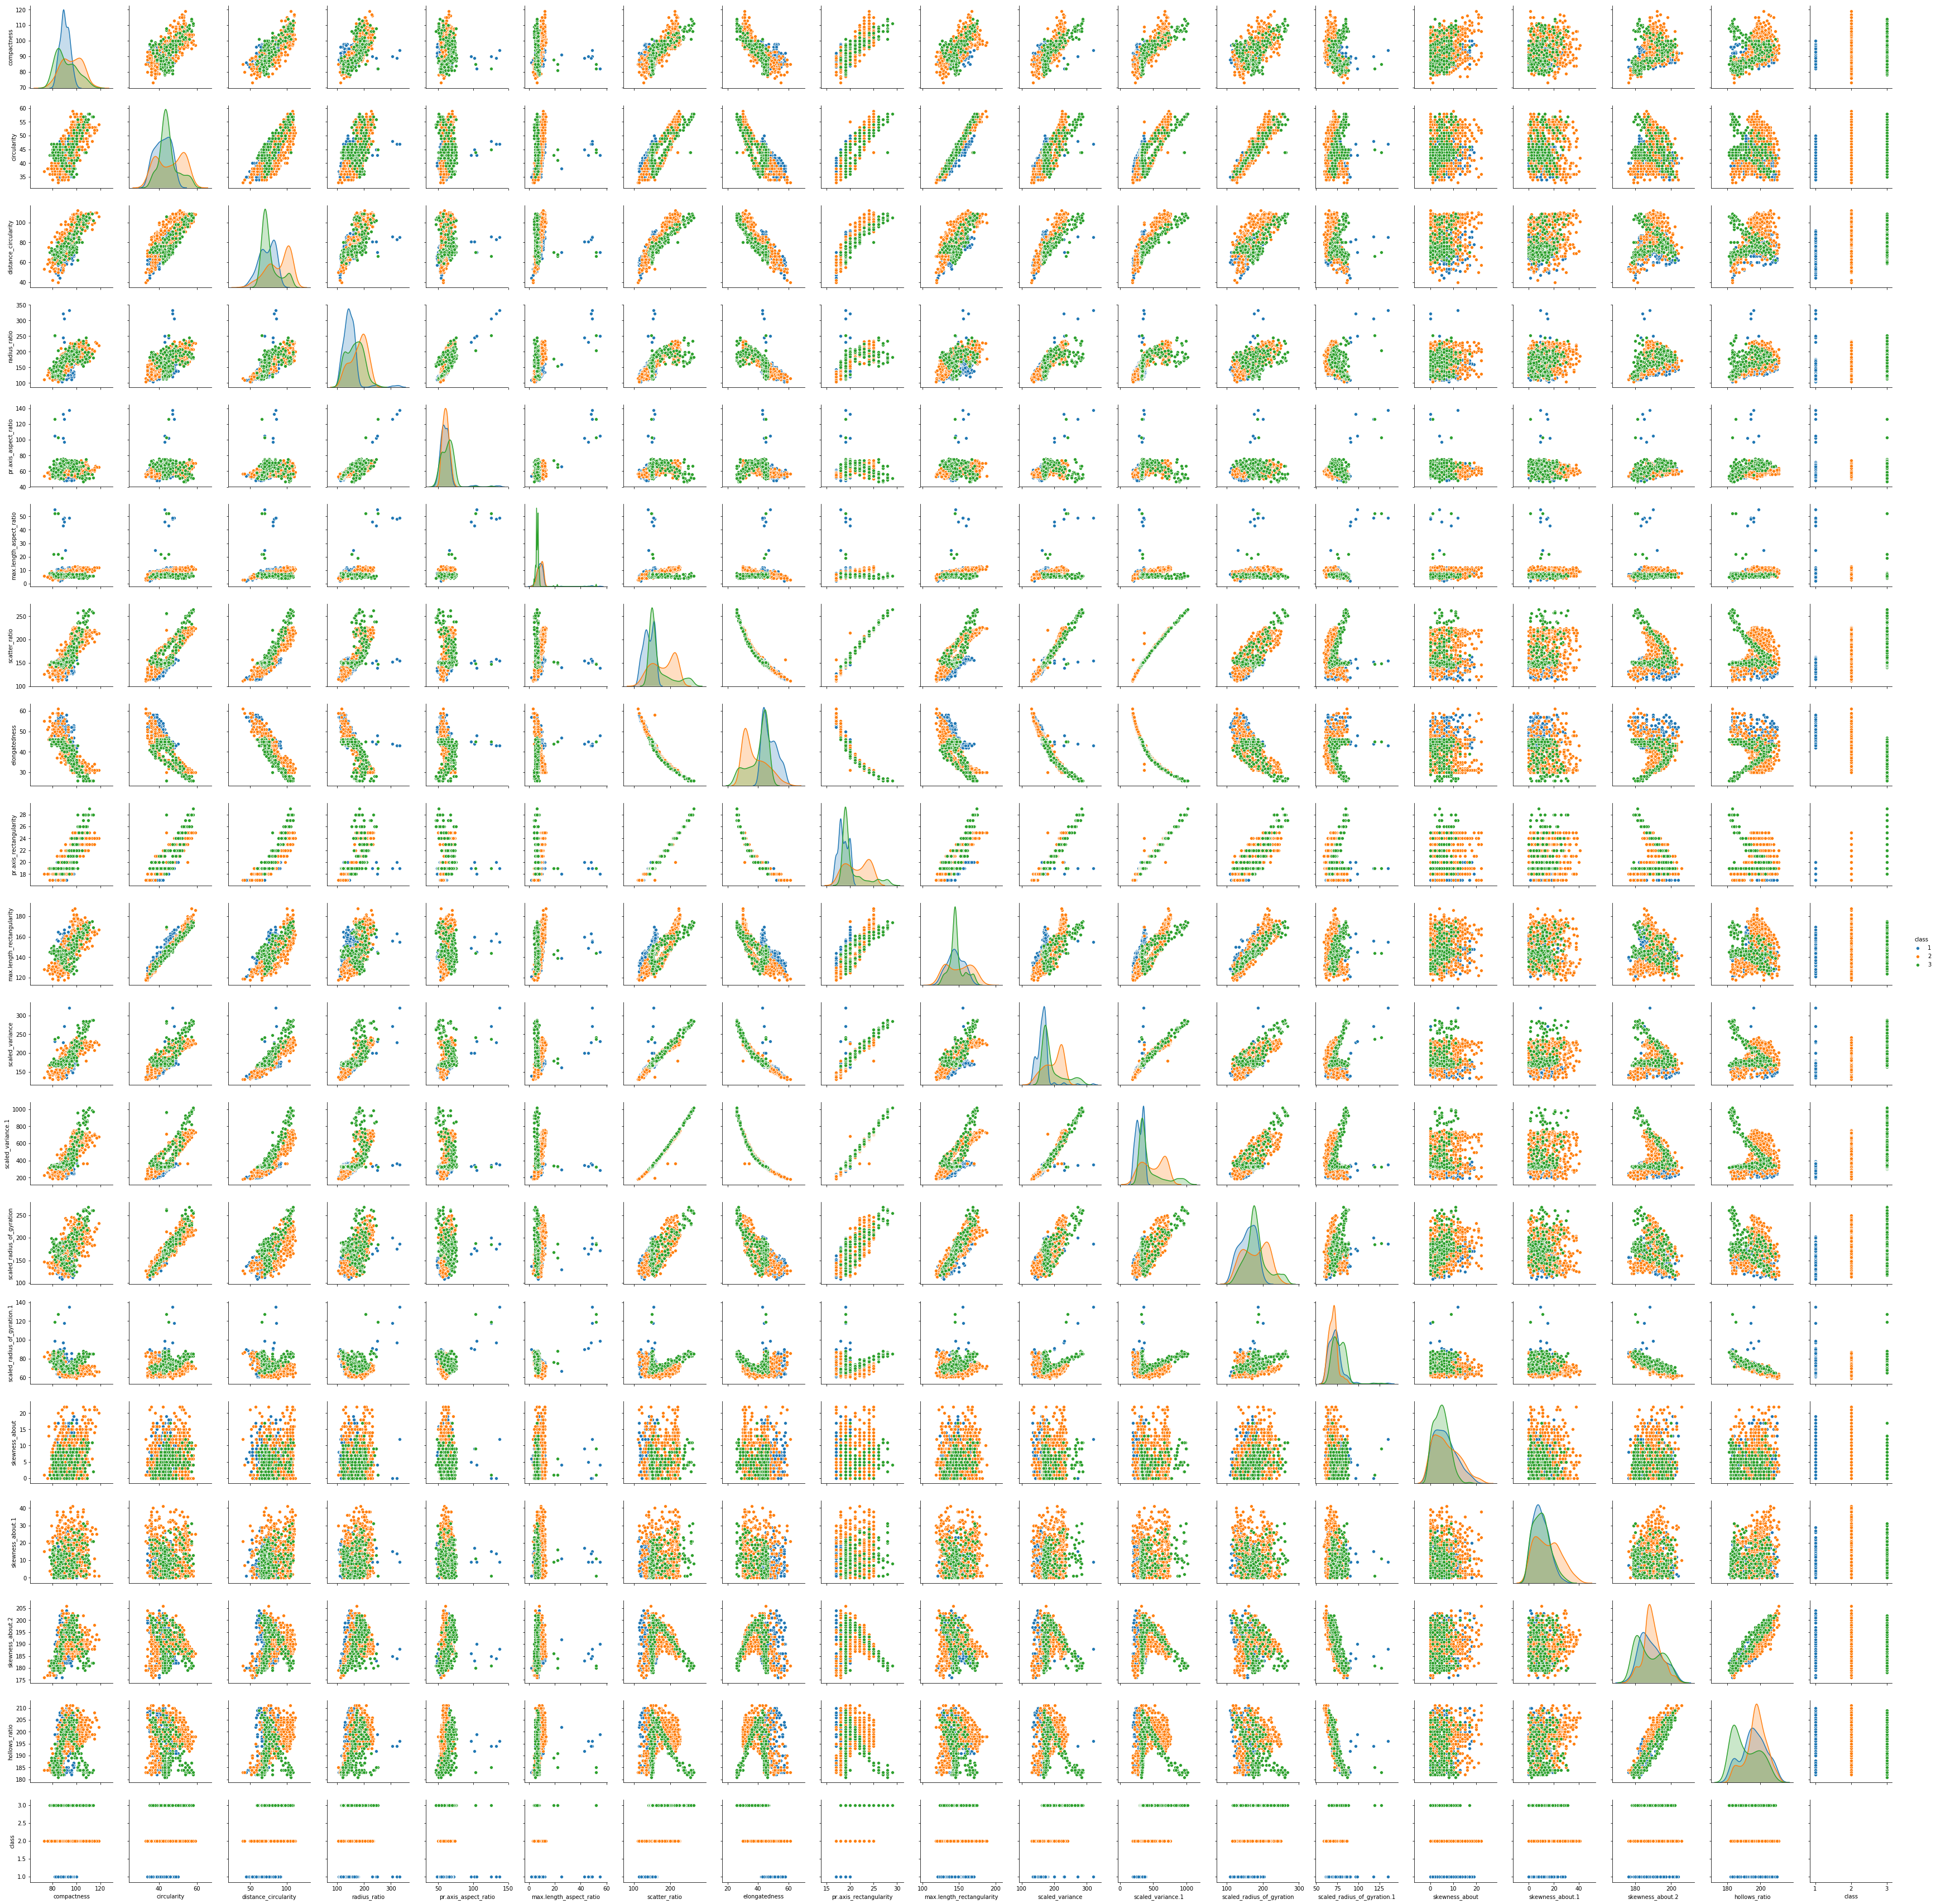

In [149]:
sns.pairplot(data_df.iloc[:,:], hue='class')

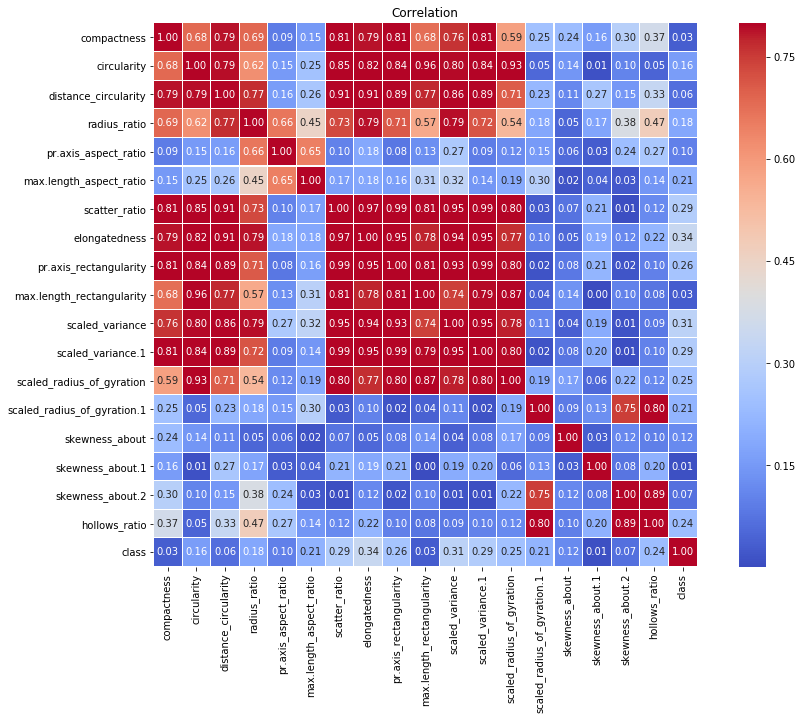

In [160]:
# Lets draw correlation chart
plt.figure(figsize=(15, 10))
sns.heatmap(data_df.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.05, cmap='coolwarm')
plt.title('Correlation')
plt.show()

###### From the above correlation chart we can see that most of the attributes are highly correlated with other attribute, its difficlut to remove attributes with out knowing the importance of these attributes. 
Lets keep all the attributesand then find which attributes covers more varience by using PCA analysis method to decide which attributes we can consider further to train my model.

In [240]:
X = data_df.iloc[:,0:17].values
y = data_df.iloc[:,18].values

In [241]:
#split the data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [242]:
#Scale the data using Standard Scalar
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [243]:
# generating the covariance matrix and the eigen values for the PCA analysis

cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00169205  0.69255281  0.79733455  0.68161233  0.06988656  0.12091963
   0.81991179 -0.79274398  0.82296986  0.6939428   0.76717477  0.82328035
   0.59420609 -0.26519181  0.21251937  0.1261633   0.29731156]
 [ 0.69255281  1.00169205  0.79972482  0.64009169  0.15959502  0.23806667
   0.85040632 -0.82457531  0.84846367  0.96349864  0.80628051  0.83872298
   0.92509916  0.03074124  0.13066399 -0.00529679 -0.08939568]
 [ 0.79733455  0.79972482  1.00169205  0.77355878  0.14974718  0.24132408
   0.91043495 -0.91866787  0.89851608  0.78590997  0.86786434  0.89128014
   0.71290688 -0.2427252   0.10960677  0.24619487  0.15711896]
 [ 0.68161233  0.64009169  0.77355878  1.00169205  0.66113789  0.45475359
   0.74087304 -0.79649641  0.71347792  0.59737762  0.78831484  0.72275123
   0.54805117 -0.19982547  0.01902221  0.17150021  0.37845154]
 [ 0.06988656  0.15959502  0.14974718  0.66113789  1.00169205  0.67088108
   0.10239046 -0.18327542  0.0760958   0.13623782  0.2541341

In [244]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 2.74158379e-01 -1.91387402e-01  7.03359555e-02  8.19391719e-02
  -3.23589422e-02 -1.76421093e-01 -4.44677535e-01  5.82371793e-01
  -4.32166166e-01 -2.91102330e-01  8.02746272e-02  9.69300582e-03
   1.06250348e-02 -1.20128921e-01  9.15125200e-02  7.61482408e-02
   2.67820069e-02]
 [ 2.95682714e-01  1.26296098e-01  6.67572171e-02  1.68849603e-01
   6.74611907e-02  3.64903641e-01  1.93653701e-01  1.75963327e-01
   7.50354340e-04  1.29082428e-01  1.71972018e-02  1.17480868e-02
  -4.36345977e-02 -2.85549386e-01 -5.27368216e-01  1.59123436e-01
   5.03495039e-01]
 [ 3.04187168e-01 -1.10856132e-01  1.98765318e-02 -6.00485396e-02
  -4.38656620e-02  1.50050652e-01 -1.28142467e-01 -4.46555882e-01
  -1.57354038e-01 -1.80141820e-01  6.74046142e-01 -1.20473191e-02
   1.24693472e-02  3.40517545e-01 -7.16933827e-02 -4.51483303e-02
   1.26203944e-01]
 [ 2.65862049e-01 -1.54618769e-01 -3.47668330e-01 -2.07460487e-02
   3.74381197e-02 -1.40600976e-01  2.10376189e-01 -8.59661229e-02
  -2.

In [245]:
print('\nEigenvalues \n%s' %sorted(e_vals, reverse=True))


Eigenvalues 
[9.403957593913493, 2.1702847654242134, 1.9278496275463923, 1.1846671374556281, 0.8957025668349018, 0.45209005960625487, 0.36153431435313943, 0.21735311059006468, 0.15664380981124562, 0.08454283220093967, 0.060647054027328694, 0.03413809674153992, 0.02828772040490889, 0.021382706459736472, 0.01814823303355963, 0.008186536087316445, 0.003348640923913249]


In [246]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 55.22395606  67.9687722   79.28990823  86.24676712  91.50670568
  94.16156682  96.2846469   97.56103491  98.4809126   98.97738333
  99.33352809  99.53400122  99.70011849  99.82568665  99.93226064
  99.98033539 100.        ]


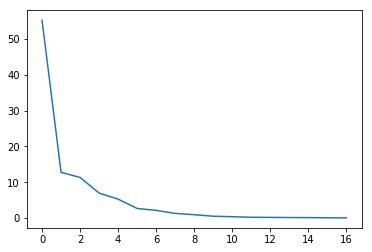

In [247]:
plt.plot(var_exp)

From the above plot we can observe that their is steep drop in variance explained with increase in number of componenets.

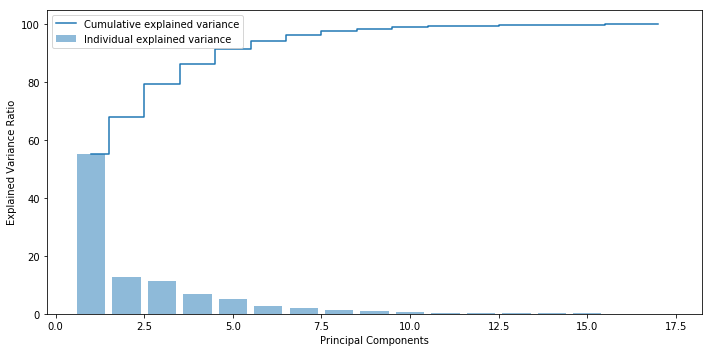

In [248]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

As per the requirement we can consider 7 principle componenets which covers more than 95% of variance.

In [249]:
# we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)

pca = PCA(n_components=7)
X_train_sd_pca = pca.fit_transform(X_train_sd)
X_test_sd_pca = pca.fit_transform(X_test_sd)
X_train_sd_pca.shape

(592, 7)

In [250]:
X_test_sd_pca.shape

(254, 7)

In [266]:
clf = LogisticRegression()
clf.fit(X_train_sd,y_train)
predict_clf = clf.predict(X_test_sd)
print("train_score:::",clf.score(X_train_sd,y_train))
print("test score",clf.score(X_test_sd,y_test))
print("Model Accuracy::",accuracy_score(y_test, predict_clf))
print("Precision::",precision_score(y_test, predict_clf, average=None))
print("Recall::",recall_score(y_test, predict_clf, average=None))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, predict_clf))


train_score::: 0.9391891891891891
test score 0.937007874015748
Model Accuracy:: 0.937007874015748
Precision:: [0.96721311 0.95967742 0.86956522]
Recall:: [0.96721311 0.93700787 0.90909091]

:
Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        61
           2       0.96      0.94      0.95       127
           3       0.87      0.91      0.89        66

   micro avg       0.94      0.94      0.94       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.94      0.94      0.94       254



#### Lets train and test different model to see the accurency

Train different model with normalised data with attributes before PCA and see the model accuracy

Model Score
Logistic         0.937008
NaiveBayes       0.598425
Bagging          0.881890
RandomForest     0.905512
AdaBoost         0.842520
SVC RBF          0.972441
SVC Linear       0.933071

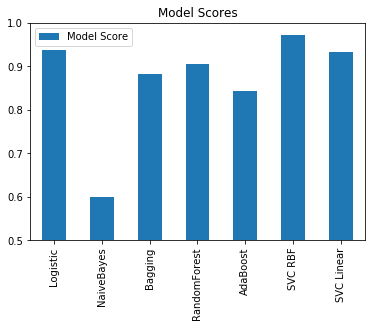

In [251]:
def lets_try(traindata,trainlabels,testdata,testlabels):
    results={}
    def test_model(clf):
        clf.fit(traindata,trainlabels)
        scores=clf.score(testdata, testlabels)
        return scores

    clf = LogisticRegression()
    results["Logistic"]=test_model(clf)

    clf = GaussianNB()
    results["NaiveBayes"]=test_model(clf)
    
    clf = BaggingClassifier()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestClassifier()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    
    clf = SVC()
    results["SVC RBF"]=test_model(clf)
    
    clf = SVC(kernel="linear")
    results["SVC Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Model Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X_train_sd,y_train,X_test_sd,y_test)

Training_Score  Test_score  Accuracy
Logistic Regression        0.939189    0.937008  0.937008
NaiveBayes                 0.616554    0.598425  0.598425
SVC RBF                    0.966216    0.972441  0.972441
SVC Leaner                 0.964527    0.933071  0.933071
Bagging                    1.000000    0.897638  0.897638
Adaboost                   0.837838    0.842520  0.842520
Random Forest              0.998311    0.917323  0.917323

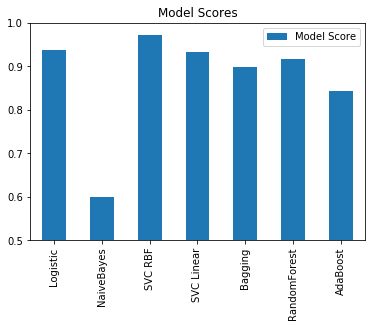

In [269]:
def lets_try(traindata,trainlabels,testdata,testlabels):
    results={}
    def test_model(clf):
        clf.fit(traindata,trainlabels)
        predict = clf.predict(testdata)
        train_score = clf.score(traindata,trainlabels)
        test_score=clf.score(testdata, testlabels)
        model_accuracy = accuracy_score(testlabels, predict)
        return [train_score,test_score,model_accuracy]


    clf = LogisticRegression()
    list_result = test_model(clf)
    results["Logistic"]=list_result[2]
    Training_score_log = list_result[0]
    Test_score_log = list_result[1]
    Accuracy_log = list_result[2]
    
    clf = GaussianNB()
    list_result = test_model(clf)
    results["NaiveBayes"]=list_result[2]
    Training_score_nb = list_result[0]
    Test_score_nb = list_result[1]
    Accuracy_nb = list_result[2]
    
    clf = SVC()
    list_result = test_model(clf)
    results["SVC RBF"]=list_result[2]
    Training_score_svc1 = list_result[0]
    Test_score_svc1 = list_result[1]
    Accuracy_svc1 = list_result[2]
    
    clf = SVC(kernel="linear")
    list_result = test_model(clf)
    results["SVC Linear"]=list_result[2]
    Training_score_svc2 = list_result[0]
    Test_score_svc2 = list_result[1]
    Accuracy_svc2 = list_result[2]
    
    clf = BaggingClassifier()
    list_result = test_model(clf)
    results["Bagging"]=list_result[1]
    Training_score_bgcl = list_result[0]
    Test_score_bgcl = list_result[1]
    Accuracy_bgcl = list_result[2]
    
    clf = RandomForestClassifier()
    list_result = test_model(clf)
    results["RandomForest"]=list_result[1]
    Training_score_rfcl = list_result[0]
    Test_score_rfcl = list_result[1]
    Accuracy_rfcl = list_result[2]
    
    clf = AdaBoostClassifier()
    list_result = test_model(clf)
    results["AdaBoost"]=list_result[1]
    Training_score_abcl = list_result[0]
    Test_score_abcl = list_result[1]
    Accuracy_abcl = list_result[2]

    Models= pd.DataFrame({'Training_Score':[Training_score_log,Training_score_nb,Training_score_svc1,Training_score_svc2,Training_score_bgcl,Training_score_abcl,Training_score_rfcl] 
                          ,'Test_score' : [Test_score_log,Test_score_nb,Test_score_svc1,Test_score_svc2,Test_score_bgcl,Test_score_abcl,Test_score_rfcl] 
                          ,'Accuracy' : [Accuracy_log,Accuracy_nb,Accuracy_svc1,Accuracy_svc2,Accuracy_bgcl,Accuracy_abcl,Accuracy_rfcl]}
                         ,index=['Logistic Regression','NaiveBayes','SVC RBF','SVC Leaner','Bagging','Adaboost','Random Forest'])
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Model Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return Models

lets_try(X_train_sd,y_train,X_test_sd,y_test)

Lets Train different model with PCA attributes and see the model accuracy

Training_Score  Test_score  Accuracy
Logistic Regression        0.797297    0.665354  0.665354
NaiveBayes                 0.766892    0.653543  0.653543
SVC RBF                    0.945946    0.692913  0.692913
SVC Leaner                 0.831081    0.645669  0.645669
Bagging                    0.989865    0.751969  0.751969
Adaboost                   0.849662    0.673228  0.673228
Random Forest              0.994932    0.614173  0.614173

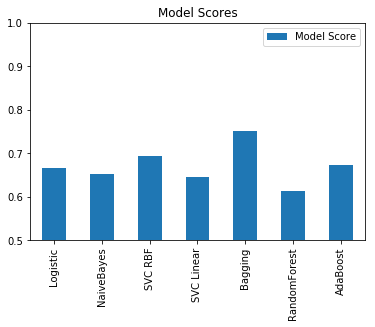

In [270]:
lets_try(X_train_sd_pca,y_train,X_test_sd_pca,y_test)

Lets do cross validation to find the R2 value with scalled data

In [296]:
def cross_val(features,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, features, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = LogisticRegression()
    results["Logistic Regression"]=test_model(clf)
    
    clf = GaussianNB()
    results["NaiveBayes"] = test_model(clf)
    
    clf = SVC()
    results["SVC RBF"]=test_model(clf)
    
    clf = SVC(kernel="linear")
    results["SVC Linear"]=test_model(clf)
    
    clf = BaggingClassifier()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestClassifier()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"]
    results.plot(kind="bar",title="R Square Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

R Square Score
Logistic Regression        0.724637
NaiveBayes                -0.945870
SVC RBF                    0.805762
SVC Linear                 0.758639
Bagging                    0.823405
RandomForest               0.795533
AdaBoost                   0.580574

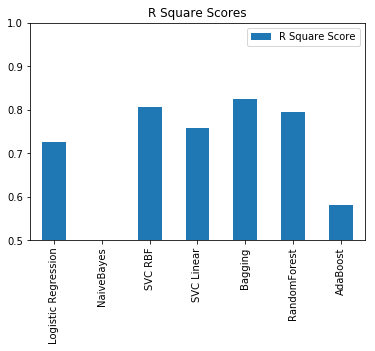

In [297]:
cross_val(X_train_sd,y_train)

R Square Score
Logistic Regression        0.722824
NaiveBayes                -0.841522
SVC RBF                    0.844803
SVC Linear                 0.659638
Bagging                    0.773389
RandomForest               0.757957
AdaBoost                   0.408805

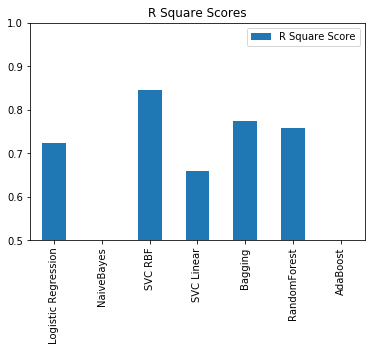

In [298]:
cross_val(X_test_sd,y_test)

Lets do cross validation to find the R2 value with PCA attributes

R Square Score
Logistic Regression        0.377711
NaiveBayes                 0.213309
SVC RBF                    0.712240
SVC Linear                 0.517208
Bagging                    0.466976
RandomForest               0.497757
AdaBoost                   0.367714

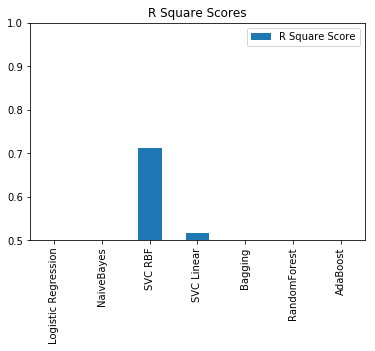

In [299]:
cross_val(X_train_sd_pca,y_train)

R Square Score
Logistic Regression        0.414978
NaiveBayes                 0.358016
SVC RBF                    0.814340
SVC Linear                 0.488816
Bagging                    0.627853
RandomForest               0.513057
AdaBoost                   0.371312

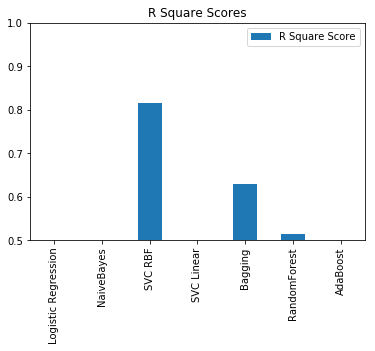

In [300]:
cross_val(X_test_sd_pca,y_test)

Lets do cross validation to find the accuracy

In [301]:
def cross_val_accuracy(features,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        val_score = cross_val_score(clf, features, labels, cv=cv,scoring='accuracy')
        scores=[val_score.mean()]
        return scores

    clf = LogisticRegression()
    results["Logistic Regression"]=test_model(clf)
    
    clf = GaussianNB()
    results["NaiveBayes"] = test_model(clf)
    
    clf = SVC()
    results["SVC RBF"]=test_model(clf)
    
    clf = SVC(kernel="linear")
    results["SVC Linear"]=test_model(clf)
    
    clf = BaggingClassifier()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestClassifier()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy"]
    results.plot(kind="bar",title="Model Accuracy")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

Accuracy
Logistic Regression  0.924014
NaiveBayes           0.597849
SVC RBF              0.947643
SVC Linear           0.940934
Bagging              0.939197
RandomForest         0.927332
AdaBoost             0.807449

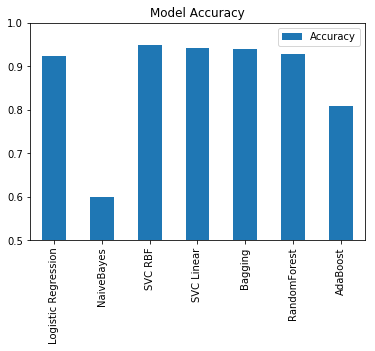

In [302]:
cross_val_accuracy(X_train_sd,y_train)

Accuracy
Logistic Regression  0.909569
NaiveBayes           0.579059
SVC RBF              0.944784
SVC Linear           0.917333
Bagging              0.874196
RandomForest         0.873961
AdaBoost             0.728235

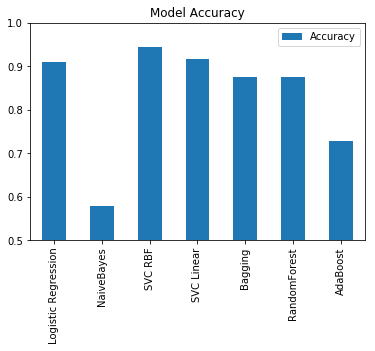

In [303]:
cross_val_accuracy(X_test_sd,y_test)

Accuracy
Logistic Regression  0.792266
NaiveBayes           0.746603
SVC RBF              0.901994
SVC Linear           0.824356
Bagging              0.837872
RandomForest         0.837844
AdaBoost             0.771956

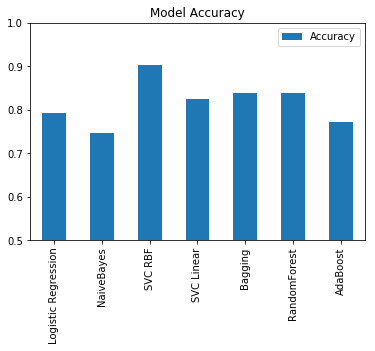

In [304]:
cross_val_accuracy(X_train_sd_pca,y_train)

Accuracy
Logistic Regression  0.771686
NaiveBayes           0.759843
SVC RBF              0.933020
SVC Linear           0.807216
Bagging              0.870196
RandomForest         0.830902
AdaBoost             0.768078

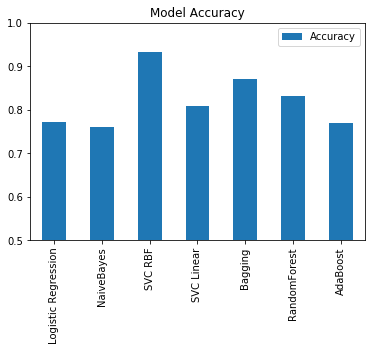

In [305]:
cross_val_accuracy(X_test_sd_pca,y_test)

#### Let's build models, but this time its hyperparameter will be tuned. You will first do this grid search.

In [442]:
parameter_candidates =  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear','rbf']}
cv = KFold(n_splits=5,shuffle=True,random_state=45)

In [444]:
# Create a classifier object with the classifier and parameter candidates
from sklearn.model_selection import cross_validate
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1, cv=cv, scoring='accuracy')
start_time = time.time()
# Train the classifier on data's feature and target data
clf.fit(X_train_sd, y_train)                     
# View the accuracy score
print('Best score for train data:', clf.best_score_) 
# Apply the classifier trained using trainset to testset, and view the accuracy score
print('Accuracy Score:', clf.score(X_test_sd, y_test)) 
# View the best parameters for the model found using grid search
print('Best Param:',clf.best_params_)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best score for train data: 0.9476351351351351
Accuracy Score: 0.9724409448818898
Best Param: {'C': 1, 'kernel': 'rbf'}
Execution time: 0.29790258407592773 ms


In [433]:
# Create a classifier object with the classifier and parameter candidates
clf1 = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1, cv=cv, scoring='accuracy')
start_time = time.time()
# Train the classifier on data1's feature and target data
clf1.fit(X_train_sd_pca, y_train) 

print('Best score for train data:', clf1.best_score_) 
# Apply the classifier trained using trainset to testset, and view the accuracy score
print('Accuracy Score:', clf1.score(X_test_sd_pca, y_test)) 
print('Best Param:',clf1.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best score for train data: 0.902027027027027
Accuracy Score: 0.6929133858267716
Best Param: {'C': 1, 'kernel': 'rbf'}
Execution time: 0.39588046073913574 ms


#### Lets defind larger grid of hyperparameter and see the accuracy score and the execution time

In [414]:
parameter_candidates1 = {'C': [1.0, 1.5, 2.0, 2.5], 'kernel': ['linear','rbf']}

In [434]:
# Create a classifier object with the classifier and parameter candidates
clf2 = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates1, n_jobs=-1, cv=cv, scoring='accuracy')
start_time = time.time()
# Train the classifier on data1's feature and target data
clf2.fit(X_train_sd, y_train) 

# View the accuracy score
print('Best score for train data:', clf2.best_score_) 
# Apply the classifier trained using trainset to testset, and view the accuracy score
print('Accuracy Score:', clf2.score(X_test_sd, y_test)) 
# View the best parameters for the model found using grid search
print('Best Param:',clf2.best_params_)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best score for train data: 0.9510135135135135
Accuracy Score: 0.9803149606299213
Best Param: {'C': 2.5, 'kernel': 'rbf'}
Execution time: 0.286407470703125 ms


In [435]:
# Create a classifier object with the classifier and parameter candidates
clf3 = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates1, n_jobs=-1, cv=cv, scoring='accuracy')
start_time = time.time()
# Train the classifier on data1's feature and target data
clf3.fit(X_train_sd_pca, y_train) 

print('Best score for train data:', clf3.best_score_) 
# Apply the classifier trained using trainset to testset, and view the accuracy score
print('Accuracy Score:', clf3.score(X_test_sd_pca, y_test)) 
print('Best Param:',clf3.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best score for train data: 0.910472972972973
Accuracy Score: 0.7125984251968503
Best Param: {'C': 1.5, 'kernel': 'rbf'}
Execution time: 0.3390052318572998 ms


We can see an increase in the accuracy score, larger the grid better the accuracy.

Lets try RandomSerach to find the best hyper parameters and see the execution times

In [436]:
rand = RandomizedSearchCV(SVC(), parameter_candidates, cv=cv, scoring='accuracy', n_iter=10, random_state=5)
start_time = time.time()
rand.fit(X_train_sd, y_train)

# examine the best model
print("Best Score:", rand.best_score_)
print("Best Params:", rand.best_params_)
print("Best Estimators:", rand.best_estimator_)
print('Accuracy Score:', rand.score(X_test_sd, y_test)) 
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score: 0.9476351351351351
Best Params: {'kernel': 'rbf', 'C': 1}
Best Estimators: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy Score: 0.9724409448818898
Execution time: 0.9544835090637207 ms


In [437]:
rand1 = RandomizedSearchCV(SVC(), parameter_candidates, cv=cv, scoring='accuracy', n_iter=10, random_state=5)
start_time = time.time()
rand1.fit(X_train_sd_pca, y_train)

# examine the best model
print("Best Score:", rand1.best_score_)
print("Best Params:", rand1.best_params_)
print("Best Estimators:", rand1.best_estimator_)
print('Accuracy Score:', rand1.score(X_test_sd_pca, y_test)) 
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score: 0.902027027027027
Best Params: {'kernel': 'rbf', 'C': 1}
Best Estimators: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy Score: 0.6929133858267716
Execution time: 0.7749843597412109 ms


#### Lets defind larger grid of hyperparameter and see the accuracy score and the execution time

In [438]:
rand2 = RandomizedSearchCV(SVC(), parameter_candidates1, cv=cv, scoring='accuracy', n_iter=10, random_state=5)
start_time = time.time()
rand2.fit(X_train_sd, y_train)

# examine the best model
print("Best Score:", rand2.best_score_)
print("Best Params:", rand2.best_params_)
print("Best Estimators:", rand2.best_estimator_)
print('Accuracy Score:', rand2.score(X_test_sd, y_test)) 
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score: 0.9510135135135135
Best Params: {'kernel': 'rbf', 'C': 2.5}
Best Estimators: SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy Score: 0.9803149606299213
Execution time: 0.7557704448699951 ms


In [439]:
rand4 = RandomizedSearchCV(SVC(), parameter_candidates1, cv=cv, scoring='accuracy', n_iter=10, random_state=5)
start_time = time.time()
rand4.fit(X_train_sd_pca, y_train)

# examine the best model
print("Best Score:", rand4.best_score_)
print("Best Params:", rand4.best_params_)
print("Best Estimators:", rand4.best_estimator_)
print('Accuracy Score:', rand4.score(X_test_sd_pca, y_test)) 
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score: 0.910472972972973
Best Params: {'kernel': 'rbf', 'C': 1.5}
Best Estimators: SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy Score: 0.7125984251968503
Execution time: 0.8053503036499023 ms
